<a href="https://www.kaggle.com/code/loka1282/red-wine-quality?scriptVersionId=109301308" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

/kaggle/input/wine-quality-dataset/WineQT.csv
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4    

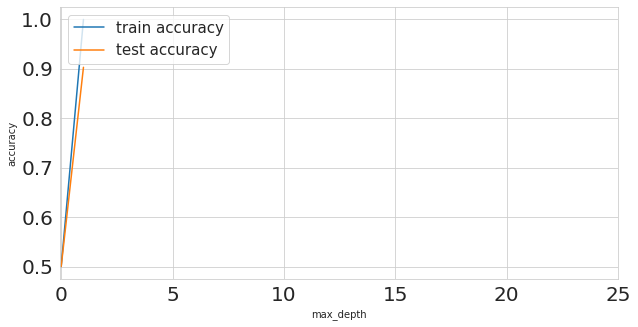

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# referred from https://www.amazon.in/Approaching-Almost-Machine-Learning-Problem-ebook/dp/B089P13QHT 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import pandas as pd
df=pd.read_csv('../input/wine-quality-dataset/WineQT.csv')
print(df.head())

quality_mapping={3:0, 4:1, 5:2, 6:3, 7:4, 8:5}
df.loc[:,"quality"] = df.quality.map(quality_mapping)
print(df)

# use sample with frac=1 to shuffle the dataframe
# we reset the indices since they change after
# shuffling the dataframe
df = df.sample(frac=1).reset_index(drop=True)
# top 1000 rows are selected
# for training
df_train = df.head(1000)
# bottom 599 values are selected
# for testing/validation
df_test = df.tail(599)
print(df_train)
print(df_test)

from sklearn import tree
from sklearn import metrics

clf=tree.DecisionTreeClassifier(max_depth=3)
cols = ['fixed acidity',
'volatile acidity',
'citric acid',
'residual sugar',
'chlorides',
'free sulfur dioxide',
'total sulfur dioxide',
'density',
'pH',
'sulphates',
'alcohol']

clf.fit(df_train[cols], df_train.quality)
train_predictions=clf.predict(df_train[cols])
test_predictions=clf.predict(df_test[cols])

train_accuracy=metrics.accuracy_score(df_train.quality, train_predictions)
test_accuracy=metrics.accuracy_score(df_test.quality, test_predictions)

print(train_accuracy)
print(test_accuracy)

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rc('xtick',labelsize=20)
matplotlib.rc('ytick',labelsize=20)

%matplotlib inline

train_accuracies=[0.5]
test_accuracies=[0.5]

for depth in range(1,25):
    clf=tree.DecisionTreeClassifier(max_depth=depth)

    cols = ['fixed acidity',
'volatile acidity',
'citric acid',
'residual sugar',
'chlorides',
'free sulfur dioxide',
'total sulfur dioxide',
'density',
'pH',
'sulphates',
'alcohol']

clf.fit(df_train[cols], df_train.quality)
train_predictions=clf.predict(df_train[cols])
test_predictions=clf.predict(df_test[cols])

train_accuracy=metrics.accuracy_score(df_train.quality, train_predictions)
test_accuracy=metrics.accuracy_score(df_test.quality, test_predictions)
    
train_accuracies.append(train_accuracy)
test_accuracies.append(test_accuracy)

# create two plots using matplotlib
# and seaborn
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={'size': 15})
plt.xticks(range(0, 26, 5))
plt.xlabel("max_depth", size=10)
plt.ylabel("accuracy", size=10)
plt.show()



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session